In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
random.seed(50)
import os

# Any results you write to the current directory are saved as output.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print(os.listdir)

<built-in function listdir>


In [9]:
dataset = pd.read_csv("./PS_20174392719_1491204439457_log.csv")
dataset.drop('nameOrig', axis=1, inplace=True)
dataset.drop('nameDest', axis=1, inplace=True)
dataset.drop('isFlaggedFraud', axis=1, inplace=True)

In [11]:
dataset.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [10]:
sample_dataframe = dataset.sample(n=100000)
X = sample_dataframe.iloc[:10000, :-1].values
y = sample_dataframe.iloc[:10000, 7].values

In [6]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()

# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [7]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

counts = np.unique(y_train, return_counts=True)

In [8]:
sample_dataframe = dataset.sample(n=100000)
X = sample_dataframe.iloc[:, :-1]
y = sample_dataframe.iloc[:, 7]

In [202]:
pd.DataFrame(X[:, 1])

,0
0,CASH_OUT
1,CASH_IN
2,CASH_OUT
3,CASH_OUT
4,CASH_OUT
...,...
99995,PAYMENT
99996,CASH_OUT
99997,DEBIT
99998,CASH_IN


In [216]:
X['CASH_IN'] = pd.get_dummies(X['type'])['CASH_IN']
X['CASH_OUT'] = pd.get_dummies(X['type'])['CASH_OUT']
X['DEBIT'] = pd.get_dummies(X['type'])['DEBIT']
X['PAYMENT'] = pd.get_dummies(X['type'])['PAYMENT']
X['TRANSFER'] = pd.get_dummies(X['type'])['TRANSFER']
X.drop('CASH_IN',axis=True,inplace=True)
X.drop('type',axis=True,inplace=True)
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
5354199,375,175951.13,733590.0,557638.87,4377525.16,4553476.29,1,0,0,0
3583424,261,7607.59,11271.0,3663.41,0.00,0.00,0,0,1,0
4605434,329,82893.58,31705.0,0.00,2815792.42,2898685.99,1,0,0,0
5686185,397,319816.55,0.0,0.00,12743772.41,13063588.96,1,0,0,0
3596729,263,1616.19,90057.0,88440.81,0.00,0.00,0,0,1,0


In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [218]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [219]:
X[0]

KeyError: 0

In [220]:
sample_dataframe = dataset.sample(n=100000)
X = sample_dataframe.iloc[:, :-1].values
y = sample_dataframe.iloc[:, 7].values

In [161]:
bnk_prt_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [132]:
bnk_prt_df[bnk_prt_df['oldbalanceDest']<bnk_prt_df['newbalanceDest']].count()

step              2806464
type              2806464
amount            2806464
nameOrig          2806464
oldbalanceOrg     2806464
newbalanceOrig    2806464
nameDest          2806464
oldbalanceDest    2806464
newbalanceDest    2806464
isFraud           2806464
isFlaggedFraud    2806464
dtype: int64

In [136]:
bnk_prt_df.iloc[2:4,:-1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1


In [7]:
bnk_prt_df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


<h3>Analysis of dataset for null values</h3>

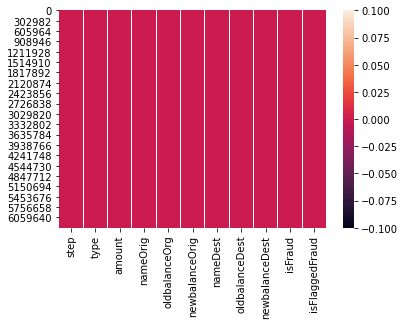

In [8]:
## Heatmap of isnull indicates that this dataset does not have any null values
sns.heatmap(bnk_prt_df.isnull())

In [7]:
bnk_prt_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<h3>Analysis of isFraud True or False</h3>

0    6354407
1       8213
Name: isFraud, dtype: int64


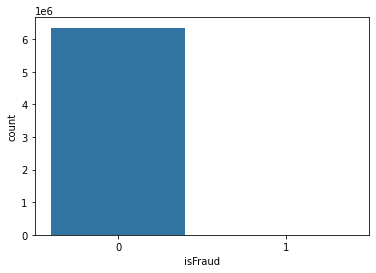

In [9]:
## Analyzing the data, seems like positive fraud data is very minimal in this dataset. Find below the stats for the same
sns.countplot(x='isFraud',data=bnk_prt_df)
print(bnk_prt_df['isFraud'].value_counts())

<h3>Analysis of type vs isFraud in the dataset </h3>

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64
['TRANSFER' 'CASH_OUT']


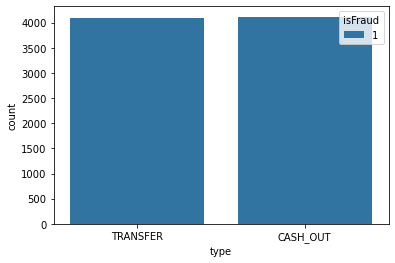

In [10]:
## Analyzing the data, seems like positive fraud data is very minimal in this dataset. 
## Analyzing only the positive fraud dataset, it seems like they belong only to the datatype - Transfer, Cash_out
## Other types doesn't seem to contribute to positive fraud data
## Find below the stats for the same

sns.countplot(x='type',data=bnk_prt_df[bnk_prt_df['isFraud']==1],hue='isFraud')
print(bnk_prt_df['type'].value_counts())
print(bnk_prt_df[bnk_prt_df['isFraud']==1]['type'].unique())

<h3>Analysis of isFlaggedFraud Vs isFraud in the dataset</h3>

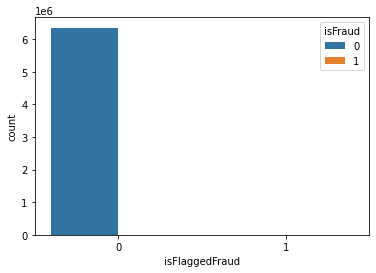

In [11]:
## 16 data which are identified as true isFlaggedFraud are identified as Fraud
## 8197 data out of 63.62 lakhs data which are identified with true isFlaggedFraud are identified as Fraud
## Among 8197 data, there are equal splits for Transfer and Cashout types

sns.countplot(x='isFlaggedFraud',data=bnk_prt_df,hue='isFraud')

In [14]:
bnk_prt_df[bnk_prt_df['isFlaggedFraud']==1]['isFraud'].value_counts()

1    16
Name: isFraud, dtype: int64

In [22]:
bnk_prt_df[bnk_prt_df['isFlaggedFraud']==0]['isFraud'].value_counts()

0    6354407
1       8197
Name: isFraud, dtype: int64

In [44]:
#false negative 
false_negatives=bnk_prt_df[np.logical_or(bnk_prt_df['isFlaggedFraud']==0,bnk_prt_df['isFraud']==1)]['isFraud'].count()
#tp
true_negatives=bnk_prt_df[np.logical_or(bnk_prt_df['isFlaggedFraud']==1,bnk_prt_df['isFraud']==1)]['isFraud'].value_counts()

#False negative rate
false_negatives/(false_negatives+true_negatives)

1    0.998711
Name: isFraud, dtype: float64

In [28]:
#calculate false negative rate
bnk_prt_df[np.logical_and(bnk_prt_df['isFlaggedFraud']==0, bnk_prt_df['isFraud']==1)]['type'].value_counts()

CASH_OUT    4116
TRANSFER    4081
Name: type, dtype: int64

In [23]:
#lets calculate false positive rate now
bnk_prt_df[np.logical_and(bnk_prt_df['isFlaggedFraud']==1,bnk_prt_df['isFraud']==0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER


<h3>Analysis of step vs isFraud in the dataset</h3>

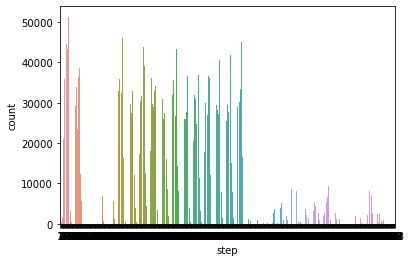

In [16]:
sns.countplot(x='step',data=bnk_prt_df)

In [17]:
bnk_prt_df['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
725        4
245        4
655        4
112        2
662        2
Name: step, Length: 743, dtype: int64

* <h3>Analysis of amount vs isFraud</h3>

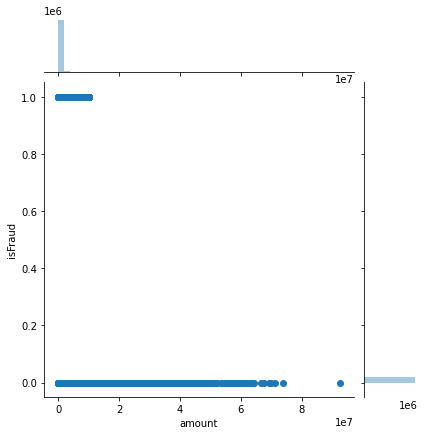

In [48]:
## Fraudulent transactions have happened when the amount is less. It is evident from the graph below
sns.jointplot(x='amount',y='isFraud',data=bnk_prt_df)

* <h3>Analysis of oldbalanceOrg vs isFraud</h3>

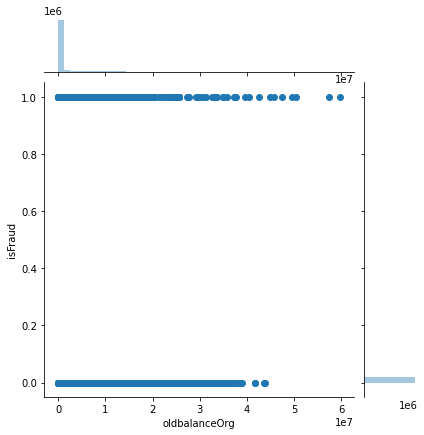

In [19]:
## fraudulent transactions are more when oldBalanceOrg of the origin from where the account transfer happened is higher than
## when it is less
sns.jointplot(x='oldbalanceOrg',y='isFraud',data=bnk_prt_df)

<h3>Analysis of newBalanceOrig vs isFraud in the dataset</h3>

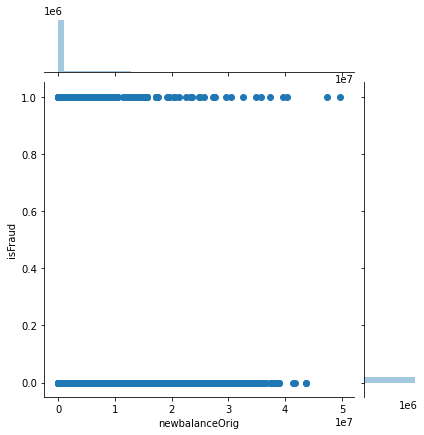

In [20]:
## fraudulent transactions are more when newBalanceOrg of the origin from where the account transfer happened is higher than
## when it is less
sns.jointplot(x='newbalanceOrig',y='isFraud',data=bnk_prt_df)

<h3>Analysis of oldbalanceDest Vs isFraud in the dataset</h3>

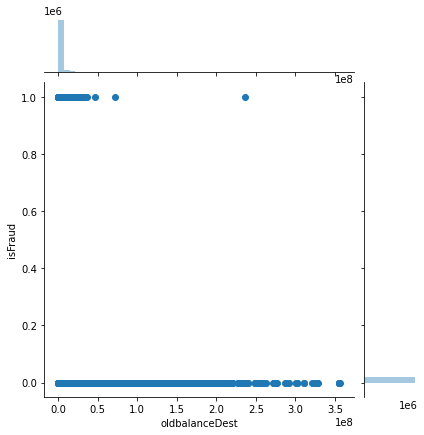

In [21]:
## fraudulent transactions are more when oldBalanceDest of the destination to where the account transfer happened is 
## higher than when it is less
sns.jointplot(x='oldbalanceDest',y='isFraud',data=bnk_prt_df)

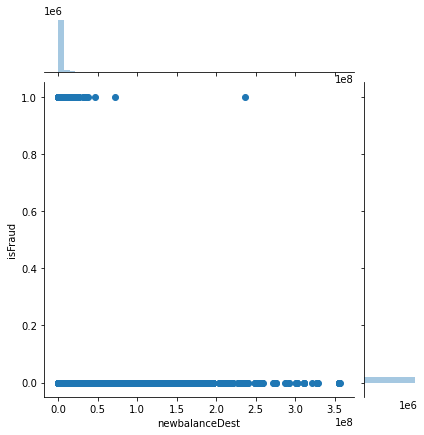

In [22]:
## fraudulent transactions are more when newbalanceDest of the destination to where the account transfer happened is 
## higher than when it is less
sns.jointplot(x='newbalanceDest',y='isFraud',data=bnk_prt_df)

In [23]:
bnk_prt_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [162]:
##One hot encoding for type column so that the values are captured

bnk_prt_df['CASH_IN'] = pd.get_dummies(bnk_prt_df['type'])['CASH_IN']
bnk_prt_df['CASH_OUT'] = pd.get_dummies(bnk_prt_df['type'])['CASH_OUT']
bnk_prt_df['DEBIT'] = pd.get_dummies(bnk_prt_df['type'])['DEBIT']
bnk_prt_df['PAYMENT'] = pd.get_dummies(bnk_prt_df['type'])['PAYMENT']
bnk_prt_df['TRANSFER'] = pd.get_dummies(bnk_prt_df['type'])['TRANSFER']
bnk_prt_df.drop('CASH_IN',axis=True,inplace=True)
bnk_prt_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [12]:
## multivariate analysis
## As seen from correlation matrix values, doesn't seem that isFraud is related to any variables here

bnk_prt_df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277,-0.012918,0.002869,0.004926,0.006925
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,-0.004376,-0.023379,-0.197444,0.365896
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,-0.200899,-0.021450,-0.189486,-0.081593
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776,-0.210977,-0.021872,-0.193915,-0.087355
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513,0.086028,0.009347,-0.231455,0.130476
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529,0.093476,0.006346,-0.238315,0.191701
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109,0.011256,-0.002911,-0.025697,0.053869
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000,-0.001168,-0.000128,-0.001133,0.005245
CASH_OUT,-0.012918,-0.004376,-0.200899,-0.210977,0.086028,0.093476,0.011256,-0.001168,1.000000,-0.059625,-0.526422,-0.222672
DEBIT,0.002869,-0.023379,-0.021450,-0.021872,0.009347,0.006346,-0.002911,-0.000128,-0.059625,1.000000,-0.057868,-0.024478


In [163]:
X = bnk_prt_df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud','CASH_OUT','DEBIT','PAYMENT','TRANSFER']]
Y = bnk_prt_df['isFraud']

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [222]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
nb = GaussianNB()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
bc = BaggingClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

In [223]:

Y_train.reset_index().iloc[:1000,:]['isFraud']

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: isFraud, Length: 1000, dtype: int64

In [235]:
X_train[:1000]

array([[ 0.36967189, -0.25413259, -0.29064819, ..., -0.08212912,
         1.39179884, -0.30025971],
       [-1.59421285, -0.26843153, -0.29064819, ..., -0.08212912,
         1.39179884, -0.30025971],
       [ 0.78497368, -0.23139371, -0.24810274, ..., -0.08212912,
        -0.71849463, -0.30025971],
       ...,
       [ 1.12988533,  0.08244293, -0.29064819, ..., -0.08212912,
        -0.71849463, -0.30025971],
       [-0.76360927, -0.19378781, -0.22319915, ..., -0.08212912,
        -0.71849463, -0.30025971],
       [-0.81288236, -0.25991088, -0.27155764, ..., -0.08212912,
         1.39179884, -0.30025971]])

In [238]:
def trainFitTest(model):
    ##models = [lr,knn,svc,nb,dtc,rfc,bc,abc,gbc]
    score = []
    ##for model in models:
    #model.fit(X_train,Y_train)
    model.fit(X_train[:1000],Y_train[:1000])
    print(' score - ',model.score(X_test,Y_test))
    score.append(model.score(X_test[:100],Y_test[:100]))
    Y_rfc_pred = model.predict(X_test[:100])
    print(Y_rfc_pred)
    print(classification_report(Y_test,Y_rfc_pred))
    print(confusion_matrix(Y_test,Y_rfc_pred))

In [225]:
#lr.predict(X_test.iloc[:1000,:])
#pd.DataFrame(lr.predict(X_test))[pd.DataFrame(lr.predict(X_test))[0]==1][0].value_counts()
X_test.iloc[:1,:]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [151]:
bnk_prt_df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud','CASH_OUT','DEBIT','PAYMENT','TRANSFER']]

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,0,0,0,0,1


In [226]:
lr.predict(bnk_prt_df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud','CASH_OUT','DEBIT','PAYMENT','TRANSFER']].iloc[2:4,:])


KeyError: "['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT'] not in index"

In [247]:
len(y_test)

30000

In [12]:
#need to do scaling and add more fields and do feature selection
#trainFitTest(lr)
lr.fit(X_train,Y_train)
Y_rfc_pred = lr.predict(X_test)
print(classification_report(Y_test,Y_rfc_pred))
print(confusion_matrix(Y_test,Y_rfc_pred))

NameError: name 'lr' is not defined

In [89]:
trainFitTest(knn)

 score -  0.998707031589712


/Users/fabianreginold/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.00      0.00      0.00      2468

    accuracy                           1.00   1908786
   macro avg       0.50      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1906318       0]
 [   2468       0]]


In [90]:
trainFitTest(dtc)

 score -  0.9969855185442476
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.07      0.11      0.09      2468

    accuracy                           1.00   1908786
   macro avg       0.53      0.55      0.54   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1902760    3558]
 [   2196     272]]


In [91]:
trainFitTest(nb)

 score -  0.5700513310554457
              precision    recall  f1-score   support

           0       1.00      0.57      0.73   1906318
           1       0.00      0.90      0.01      2468

    accuracy                           0.57   1908786
   macro avg       0.50      0.73      0.37   1908786
weighted avg       1.00      0.57      0.72   1908786

[[1085897  820421]
 [    259    2209]]


In [92]:
##trainFitTest(svc)

In [93]:
trainFitTest(rfc)

 score -  0.998707031589712


/Users/fabianreginold/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.00      0.00      0.00      2468

    accuracy                           1.00   1908786
   macro avg       0.50      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1906318       0]
 [   2468       0]]


In [94]:
trainFitTest(bc)

 score -  0.9975754222841114
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.00      0.00      0.00      2468

    accuracy                           1.00   1908786
   macro avg       0.50      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1904148    2170]
 [   2458      10]]


In [95]:
trainFitTest(abc)

 score -  0.9976330505357855
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.26      0.46      0.33      2468

    accuracy                           1.00   1908786
   macro avg       0.63      0.73      0.67   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1903143    3175]
 [   1343    1125]]


In [96]:
trainFitTest(gbc)

 score -  0.9968367328762889
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.07      0.11      0.08      2468

    accuracy                           1.00   1908786
   macro avg       0.53      0.56      0.54   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1902471    3847]
 [   2191     277]]
